In [4]:
import importlib, sqlite3, json, os
for lib in ["pandas","matplotlib","seaborn"]:
    try:
        importlib.import_module(lib)
        print(f"{lib} OK")
    except ModuleNotFoundError:
        print(f"{lib} missing!")

print("\nSQLite DB Exists:", os.path.exists("data/reminder_system.db"))


pandas OK
matplotlib OK
seaborn OK

SQLite DB Exists: True



 Starting Day 5 – Data Validation & EDA

All data loaded successfully!
Patients: (500, 9)
Doctors: (30, 6)
Appointments: (2000, 8)
Wearables: (3500, 5)

 Missing Values Summary:

Patients     → 0 missing values
Doctors      → 0 missing values
Appointments → 0 missing values
Wearables    → 0 missing values

Joined dataset shape: (2000, 21)
Sample merged data:
                         appointment_id                            patient_id  \
0  18b17f3e-d02c-4004-aca8-9c7a3a979c30  9a076d8d-0b5a-4dcb-8f2d-edd2f37244ff   
1  4ba87d44-4b58-4413-baa6-787aedb548eb  eaf9e765-5c1e-460d-9a43-8cc9d3ac0e0d   
2  cc18f940-f0ce-4108-a5bd-95aaf8bd1652  b47db39c-9068-45ad-b689-4bbde6ded2b0   
3  c552a087-ca7c-4dbb-88a5-3a638175b940  3249d086-ae87-4a57-8ac5-49cbb01d40e2   
4  97f39f7b-2181-4c47-9c50-7de5b11f507d  623ffa81-c9c6-4a2d-9fc1-01fd5072ac27   

                              doctor_id appointment_date time_slot     status  \
0  6d45365b-b364-4ea5-a083-d56296870e25       2025-12-01  12:00 PM  Co

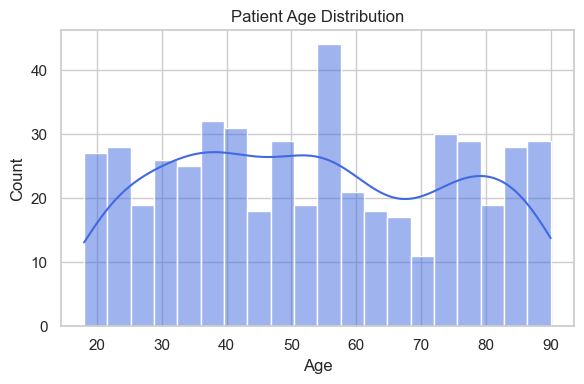

C:\Users\reddy\AppData\Local\Temp\ipykernel_15072\2047695139.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=patients, palette="pastel")


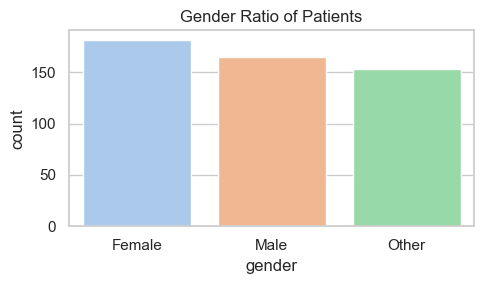

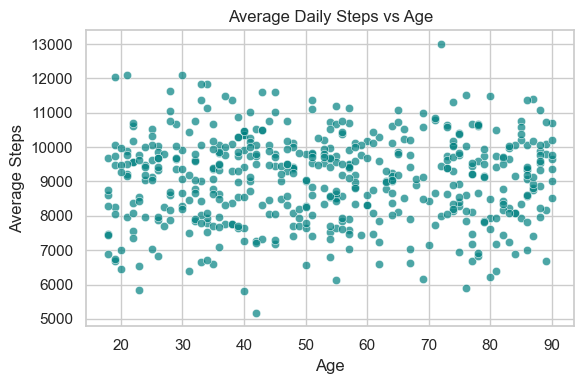

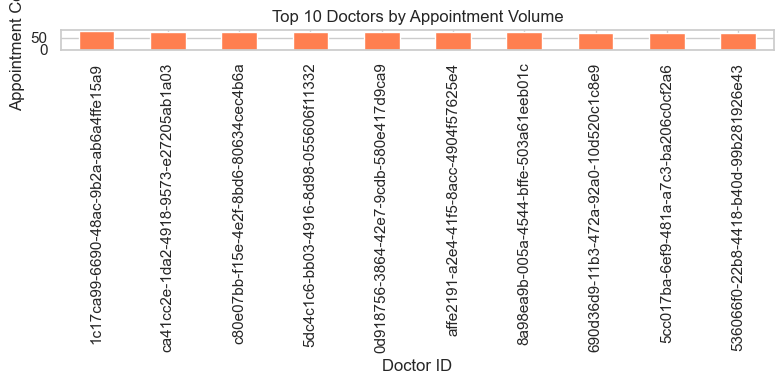


 Storing validated data to SQLite...
Data successfully stored in reminder_system.db


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sqlite3
import os

# --- Setup ---
sns.set(style="whitegrid")

print("\n Starting Day 5 – Data Validation & EDA\n")

# --- Load Datasets ---
patients = pd.read_csv("data/patients.csv")
doctors = pd.read_csv("data/doctors.csv")
appointments = pd.read_csv("data/appointments.csv")
wearables = pd.read_csv("data/wearables.csv")

with open("data/doctor_calendar.json") as f:
    doctor_cal = json.load(f)
with open("data/patient_calendar.json") as f:
    patient_cal = json.load(f)

print("All data loaded successfully!")
print(f"Patients: {patients.shape}")
print(f"Doctors: {doctors.shape}")
print(f"Appointments: {appointments.shape}")
print(f"Wearables: {wearables.shape}")

# --- Missing Data Check ---
print("\n Missing Values Summary:\n")
for name, df in {
    "Patients": patients,
    "Doctors": doctors,
    "Appointments": appointments,
    "Wearables": wearables
}.items():
    print(f"{name:12s} → {df.isna().sum().sum()} missing values")

# --- Join Integrity ---
merged = (
    appointments
    .merge(patients, on="patient_id", how="left")
    .merge(doctors, on="doctor_id", how="left")
)
print(f"\nJoined dataset shape: {merged.shape}")
print("Sample merged data:")
print(merged.head())

# --- EDA Visualizations ---
print("\n Generating EDA visualizations...\n")

plt.figure(figsize=(6,4))
sns.histplot(patients["age"], bins=20, kde=True, color="royalblue")
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x="gender", data=patients, palette="pastel")
plt.title("Gender Ratio of Patients")
plt.tight_layout()
plt.show()

steps_avg = wearables.groupby("patient_id")["steps"].mean().reset_index()
merged_steps = patients.merge(steps_avg, on="patient_id", how="left")

plt.figure(figsize=(6,4))
sns.scatterplot(data=merged_steps, x="age", y="steps", alpha=0.7, color="teal")
plt.title("Average Daily Steps vs Age")
plt.xlabel("Age")
plt.ylabel("Average Steps")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
appointments["doctor_id"].value_counts().head(10).plot(kind="bar", color="coral")
plt.title("Top 10 Doctors by Appointment Volume")
plt.xlabel("Doctor ID")
plt.ylabel("Appointment Count")
plt.tight_layout()
plt.show()

# --- Store to SQLite ---
print("\n Storing validated data to SQLite...")
conn = sqlite3.connect("data/reminder_system.db")

patients.to_sql("patients", conn, if_exists="replace", index=False)
doctors.to_sql("doctors", conn, if_exists="replace", index=False)
appointments.to_sql("appointments", conn, if_exists="replace", index=False)
wearables.to_sql("wearables", conn, if_exists="replace", index=False)

conn.close()
print("Data successfully stored in reminder_system.db")

